In [1]:
# ETL: Extraction, Transformation, Load
# Data extraction is where data is extracted from homogeneous or heterogeneous 
#   data sources; 
# Data transformation where the data is transformed for storing in the proper 
#   format or structure for the purposes of querying and analysis; 
# Data loading where the data is loaded into the final target database, 
#   more specifically, an operational data store, data mart, or data warehouse.

# EXTRACTION
# Load data in R
# You can copy paste data on the console (not the best way to import data in R)

datos<-c(41,55,23,53,22,39,83,28,30,87,77,51)
summary(datos)


# We can load data from local files in the hard drive
# Download de zip file Datos 1 in Sicua Semana 2
# IMPORTANT: Save the files in the working directory

# To get the working directory use
# getwd() 

# To change the working directory use
# setwd()

# Data Import in R
# See: http://www.r-tutor.com/r-introduction/data-frame/data-import

# Read a text file (.txt)

dat <- read.table("experiencia.txt")
head(dat)

# If you want R to take the first row as header, use
dat <- read.table("experiencia.txt", header=TRUE)

head(dat)
class(dat)
str(dat)
# dat is a data.frame
# You can use dat$Edad to access the Edad attribute

# Some additional functions 
# read.csv(), para cargar datos de archivos .csv (delimitados por comma), con “.”
#   como separador de decimales
# read.csv2(), para cargar datos de archivos .csv con “,” como separador de
#   decimales
# read.delim(), para cargar datos de archivos .txt separados por tabs, con “.” como
#   separador de decimales
# read.delim2(), para cargar datos de archivos .txt separados por tabs, con “,” 
#   como separador de decimales

dat2 <- read.delim2("experiencia2.txt")

head(dat2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.00   29.50   46.00   49.08   60.50   87.00 

V1,V2,V3
Edad,Exp,Ciudad
32,7,Ibague
24,4,Bogota
26,8,Medellin
30,5,Bogota
23,3,Zipaquira


Edad,Exp,Ciudad
32,7,Ibague
24,4,Bogota
26,8,Medellin
30,5,Bogota
23,3,Zipaquira
24,3,Bogota


[1] "data.frame"

'data.frame':	8 obs. of  3 variables:
 $ Edad  : int  32 24 26 30 23 24 31 36
 $ Exp   : int  7 4 8 5 3 3 8 7
 $ Ciudad: Factor w/ 5 levels "Bogota","Bucaramanga",..: 3 1 4 1 5 1 2 1


Caso,Exp,Ciudad
1,7.2,Ibague
2,4.0,Bogota
3,8.1,Medellin
4,5.3,Bogota
5,3.2,Zipaquira
6,3.8,Bogota


In [2]:
# We can read MS Excel files with the following library
# install.packages("XLConnect")
library(XLConnect)

dat3 <- readWorksheetFromFile("experiencia.xlsx", sheet=1) # you can specify the sheet
dat3 <- readWorksheetFromFile("experiencia.xlsx",sheet="Parte1") # or the name of the sheet

head(dat3)

# You can import a workbook 
wb <- loadWorkbook("experiencia.xlsx")
# And then select the sheet 
dat4 <- readWorksheet(wb,sheet=2); str(wb); str(dat4)

head(dat4)

Loading required package: XLConnectJars
XLConnect 0.2-13 by Mirai Solutions GmbH [aut],
  Martin Studer [cre],
  The Apache Software Foundation [ctb, cph] (Apache POI),
  Graph Builder [ctb, cph] (Curvesapi Java library)
http://www.mirai-solutions.com ,
http://miraisolutions.wordpress.com


Exp,Ciudad
7.2,Ibague
4.0,Bogota
8.1,Medellin
5.3,Bogota
3.2,Zipaquira
3.8,Bogota


Formal class 'workbook' [package "XLConnect"] with 2 slots
  ..@ filename: chr "experiencia.xlsx"
  ..@ jobj    :Formal class 'jobjRef' [package "rJava"] with 2 slots
  .. .. ..@ jobj  :<externalptr> 
  .. .. ..@ jclass: chr "com/miraisolutions/xlconnect/integration/r/RWorkbookWrapper"
'data.frame':	8 obs. of  2 variables:
 $ Edad        : num  34 23 33 26 24 32 37 28
 $ Estado.civil: chr  "C" "S" "S" "C" ...


Edad,Estado.civil
34,C
23,S
33,S
26,C
24,S
32,S


In [3]:
# Load files from the internet
path <- "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Nile.csv"
ejemplo<-read.table(path, header=T, sep=",")
head(ejemplo); str(ejemplo)

# See the following data repositories
# R-datasets: https://vincentarelbundock.github.io/Rdatasets/datasets.html
# UCI Machine learning: https://archive.ics.uci.edu/ml/datasets.html

X,time,Nile
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160
6,1876,1160


'data.frame':	100 obs. of  3 variables:
 $ X   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ time: int  1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 ...
 $ Nile: int  1120 1160 963 1210 1160 1160 813 1230 1370 1140 ...


time series starts 2013-11-06
time series ends   2017-08-23


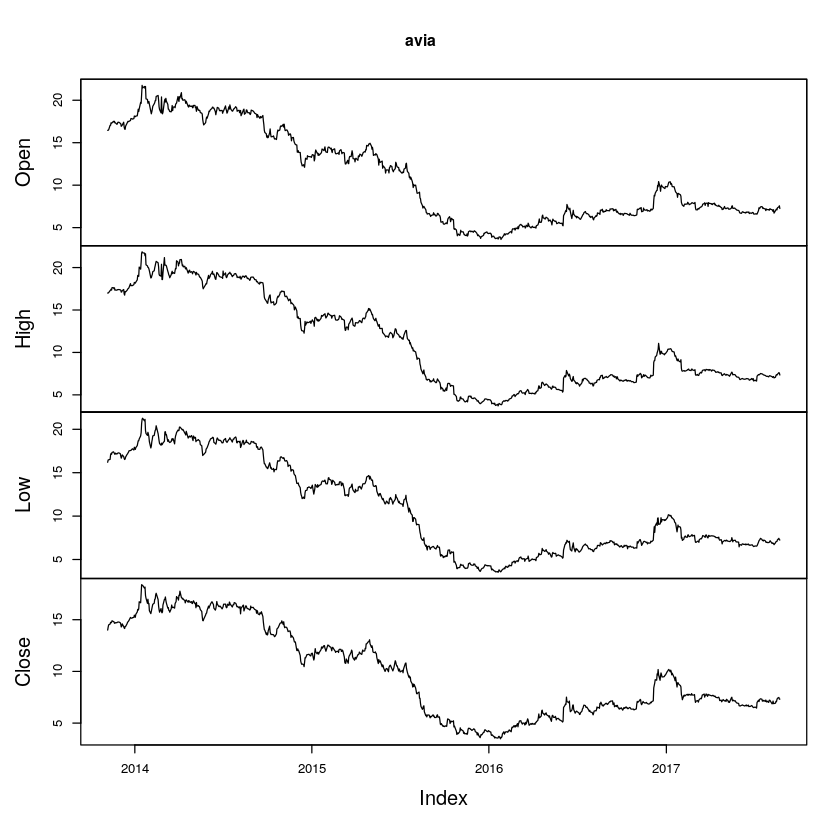

In [5]:
# And many more
# tseries is a package for time series analysis
# tseries gets stock data from yahoo finace data
# install.packages("tseries"); 
library(tseries)
avia<-get.hist.quote("AVH")
plot(avia)

In [11]:
# Load data from MySQL databases
# Use the package
# install.packages("RMySQL")
library(RMySQL)

# There are several servers and MySQL databases, on various organisms
# As an example we have a server called "ensembldb.ensembl.org", 
# with a database that called "homo_sapiens_core_85_38" 
# and allows access with the
# User "anonymous", and no password
serv <- "ensembldb.ensembl.org";
db <- "homo_sapiens_core_85_38"

# Connect ot database
mydb <- dbConnect(MySQL(),user='anonymous',dbname=db,host=serv)

# List database tables
dbListTables(mydb)

# You can check class for the objects above too
# class(mydb) 

# List fields of table gene 
dbListFields(mydb, "gene")

[1] "alt_allele"                           
 [2] "alt_allele_attrib"                    
 [3] "alt_allele_group"                     
 [4] "analysis"                             
 [5] "analysis_description"                 
 [6] "assembly"                             
 [7] "assembly_exception"                   
 [8] "associated_group"                     
 [9] "associated_xref"                      
[10] "attrib_type"                          
[11] "coord_system"                         
[12] "data_file"                            
[13] "density_feature"                      
[14] "density_type"                         
[15] "dependent_xref"                       
[16] "ditag"                                
[17] "ditag_feature"                        
[18] "dna"                                  
[19] "dna_align_feature"                    
[20] "exon"                                 
[21] "exon_transcript"                      
[22] "external_db"                          
[23] "external_synonym"                     
[24] "gene"                                 
[25] "gene_archive"                         
[26] "gene_attrib"                          
[27] "genome_statistics"                    
[28] "identity_xref"                        
[29] "interpro"                             
[30] "intron_supporting_evidence"           
[31] "karyotype"                            
[32] "map"                                  
[33] "mapping_session"                      
[34] "mapping_set"                          
[35] "marker"                               
[36] "marker_feature"                       
[37] "marker_map_location"                  
[38] "marker_synonym"                       
[39] "meta"                                 
[40] "meta_coord"                           
[41] "misc_attrib"                          
[42] "misc_feature"                         
[43] "misc_feature_misc_set"                
[44] "misc_set"                             
[45] "object_xref"                          
[46] "ontology_xref"                        
[47] "operon"                               
[48] "operon_transcript"                    
[49] "operon_transcript_gene"               
[50] "peptide_archive"                      
[51] "prediction_exon"                      
[52] "prediction_transcript"                
[53] "protein_align_feature"                
[54] "protein_feature"                      
[55] "repeat_consensus"                     
[56] "repeat_feature"                       
[57] "seq_region"                           
[58] "seq_region_attrib"                    
[59] "seq_region_mapping"                   
[60] "seq_region_synonym"                   
[61] "simple_feature"                       
[62] "stable_id_event"                      
[63] "supporting_feature"                   
[64] "transcript"                           
[65] "transcript_attrib"                    
[66] "transcript_intron_supporting_evidence"
[67] "transcript_supporting_feature"        
[68] "translation"                          
[69] "translation_attrib"                   
[70] "unmapped_object"                      
[71] "unmapped_reason"                      
[72] "xref"

[1] "gene_id"                 "biotype"                
 [3] "analysis_id"             "seq_region_id"          
 [5] "seq_region_start"        "seq_region_end"         
 [7] "seq_region_strand"       "display_xref_id"        
 [9] "source"                  "status"                 
[11] "description"             "is_current"             
[13] "canonical_transcript_id" "stable_id"              
[15] "version"                 "created_date"           
[17] "modified_date"

In [12]:
# Store table gene in a dataframe
TBgene <- dbReadTable(mydb, "gene")

# We can also query the database
query <- "SELECT gene_id,biotype FROM gene WHERE status='KNOWN'"
TBgene2 <- dbGetQuery(mydb,query)
head(TBgene2)

# More on SQL: https://www.tutorialspoint.com/sql/sql-select-query.htm

Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 0 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 2 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 3 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 4 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 5 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 7 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 12 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 14 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 0 imported as numeric”

gene_id,biotype
1,snRNA
2,misc_RNA
3,lincRNA
4,sRNA
5,lincRNA
6,lincRNA
